In [17]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split

In [18]:
#!pip install pandas

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


To begin, we will be viewing a set of files analyzing how college major impacts a graduate's career. 

We will first view, all-ages.csv, which categorizes college graduates by major and shows the total employed, unemployed, and their median earnings. 

In [20]:
df=pd.read_csv('/content/drive/MyDrive/i310DFinal/all-ages.csv')

In [21]:
df.head()

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


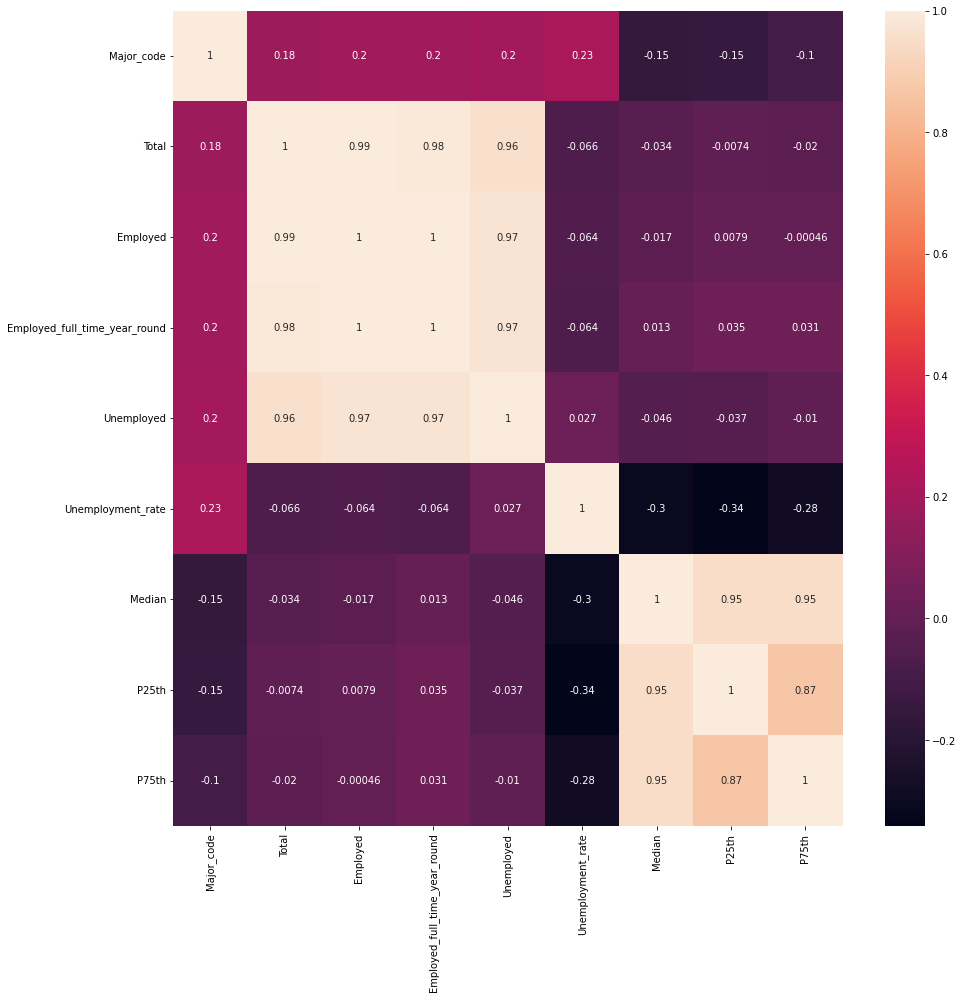

In [22]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True)

As indicated above by the matrix, the fields seem to have virtually no correlation. However, we can note that the fields that have the most correlation are major code and unemployment rate (0.23).

As we are unable to determine any relevant information from the previous dataframe, we will view, recent-grads.csv, which relays the same infromation as the first, but contains additional information including sex and job type. 



In [23]:
dfrecentgrad=pd.read_csv('/content/drive/MyDrive/i310DFinal/recent-grads.csv')

In [24]:
dfrecentgrad.head()

,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,36,2057,282,0.120564,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,7,679,77,0.101852,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,3,725,131,0.153037,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,16,1123,135,0.107313,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,Engineering,32260,289,21239,11021,0.341631,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


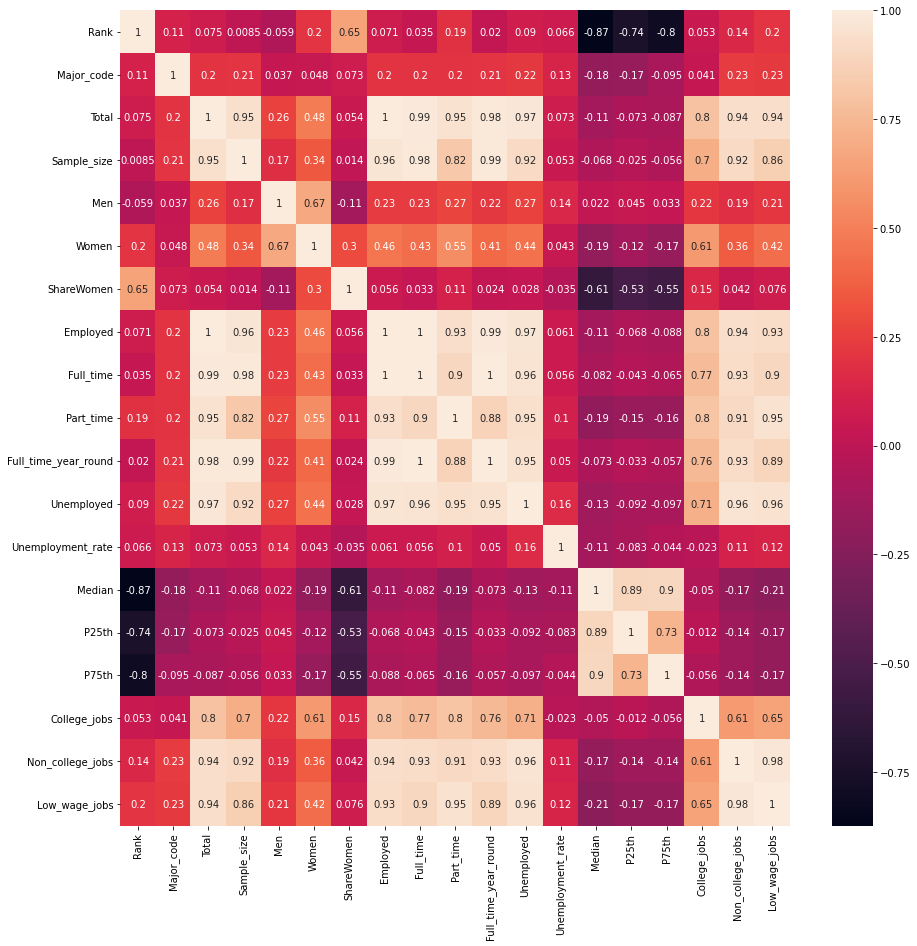

In [25]:
corr_matrix = dfrecentgrad.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True)

This dataframe is much more comprehensive and we are able to see much more correlation between the different fields. We will assume that values that have a correlation are above 0.40.

With this in mind, we can see that majority of the values at or above this threshold relate the fields 'Men' and 'Women'. We have now determined that gender plays a large role in employment and full-time status.

The purpose of this project is to deterimine if their is a correlation between gender, college major, and median wage in college graduates. We hypothesize that, due to the wage gap, our data analysis will indicate that men typically earn a greater median wage. This has proven to be historically true and we would like to determine why and if this wage gap can be seen through numbers.

This leads into our third dataframe, womenstem.csv, which is a subset of the second dataframe. We will primarily be utilizing this dataframe as it is relevant to our research.

In [26]:
dfwomenstem=pd.read_csv('/content/drive/MyDrive/i310DFinal/women-stem.csv')
dfwomenstem.head()

,Rank,Major_code,Major,Major_category,Total,Men,Women,ShareWomen,Median
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,2057,282,0.120564,110000
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,679,77,0.101852,75000
2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,725,131,0.153037,73000
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135,0.107313,70000
4,5,2418,NUCLEAR ENGINEERING,Engineering,2573,2200,373,0.144967,65000


We will begin our analysis by dropping columns that do not pertain to our project purpose.

In [27]:
dfwomenstem = dfwomenstem.drop(['Major_code', 'ShareWomen', 'Rank'], axis = 1)
dfwomenstem.head()

,Major,Major_category,Total,Men,Women,Median
0,PETROLEUM ENGINEERING,Engineering,2339,2057,282,110000
1,MINING AND MINERAL ENGINEERING,Engineering,756,679,77,75000
2,METALLURGICAL ENGINEERING,Engineering,856,725,131,73000
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135,70000
4,NUCLEAR ENGINEERING,Engineering,2573,2200,373,65000


We will now determine which majors are popular based on gender. We will measure this by sorting the chart in ascending order according to the sample size of both genders.
To simplify this process, we will limit ourselves to viewing only the top 10 majors for both charts.


In [28]:
top_women = dfwomenstem.sort_values(by="Women", ascending = False)
top_women.head(10)

,Major,Major_category,Total,Men,Women,Median
26,NURSING,Health,209394,21773,187621,48000
70,BIOLOGY,Biology & Life Science,280709,111762,168947,33400
74,COMMUNICATION DISORDERS SCIENCES AND SERVICES,Health,38279,1225,37054,28000
62,MULTI-DISCIPLINARY OR GENERAL SCIENCE,Physical Sciences,62052,27015,35037,35000
72,TREATMENT THERAPY PROFESSIONS,Health,48491,13487,35004,33000
50,CHEMISTRY,Physical Sciences,66530,32923,33607,39000
33,MATHEMATICS,Computers & Mathematics,72397,39956,32441,45000
18,COMPUTER SCIENCE,Computers & Mathematics,128319,99743,28576,53000
73,GENERAL MEDICAL AND HEALTH SERVICES,Health,33599,7574,26025,32400
46,ARCHITECTURE,Engineering,46420,25463,20957,40000


In [29]:
top_men = dfwomenstem.sort_values(by="Men", ascending = False)
top_men.head(10)

,Major,Major_category,Total,Men,Women,Median
70,BIOLOGY,Biology & Life Science,280709,111762,168947,33400
18,COMPUTER SCIENCE,Computers & Mathematics,128319,99743,28576,53000
7,MECHANICAL ENGINEERING,Engineering,91227,80320,10907,60000
9,ELECTRICAL ENGINEERING,Engineering,81527,65511,16016,60000
16,GENERAL ENGINEERING,Engineering,61152,45683,15469,56000
22,CIVIL ENGINEERING,Engineering,53153,41081,12072,50000
33,MATHEMATICS,Computers & Mathematics,72397,39956,32441,45000
10,COMPUTER ENGINEERING,Engineering,41542,33258,8284,60000
50,CHEMISTRY,Physical Sciences,66530,32923,33607,39000
30,COMPUTER AND INFORMATION SYSTEMS,Computers & Mathematics,36698,27392,9306,45000


As seen above, although both charts are intended to show the top majors between both genders, the gap between men and women in the majors seems to be insignificant. Thus, rather than showing the top major between both genders, we are showing two lists of majors that are an overall popular choice for both genders.

To combat this discrepancy, we will instead rank majors by the ratio of women to men *(total number of women)/(total number of men)* and vice versa *(total number of men)/(total number of women)*.



In [30]:
women_ratio = dfwomenstem.copy()
women_ratio.drop(women_ratio[(women_ratio['Women'] <= women_ratio['Men'])].index, inplace = True)
women_ratio['Ratio'] = np.where((women_ratio['Men'] < women_ratio['Women']), women_ratio['Women']/women_ratio['Men'], "0")
women_ratio = women_ratio.sort_values(by="Ratio", ascending = False)
women_ratio = women_ratio.head(15)
women_ratio.head(10)

,Major,Major_category,Total,Men,Women,Median,Ratio
26,NURSING,Health,209394,21773,187621,48000,8.61714049510862
58,MISCELLANEOUS HEALTH MEDICAL PROFESSIONS,Health,13386,1589,11797,36000,7.424166142227817
66,NUTRITION SCIENCES,Health,18909,2563,16346,35000,6.377682403433476
74,COMMUNICATION DISORDERS SCIENCES AND SERVICES,Health,38279,1225,37054,28000,30.248163265306122
67,COMMUNITY AND PUBLIC HEALTH,Health,19735,4103,15632,34000,3.809895198635145
73,GENERAL MEDICAL AND HEALTH SERVICES,Health,33599,7574,26025,32400,3.436097174544494
65,HEALTH AND MEDICAL ADMINISTRATIVE SERVICES,Health,18109,4266,13843,35000,3.244960150023441
36,MEDICAL TECHNOLOGIES TECHNICIANS,Health,15914,3916,11998,45000,3.063840653728294
28,"NUCLEAR, INDUSTRIAL RADIOLOGY, AND BIOLOGICAL ...",Physical Sciences,2116,528,1588,46000,3.007575757575758
72,TREATMENT THERAPY PROFESSIONS,Health,48491,13487,35004,33000,2.5953881515533475


From this chart, we can determine that women predominately major in health and science related fields.

Note that health realted majors may be on the pre-med track and may go to medical school. Their earnings may reflect their pay during residency. This is all speculation.

In [31]:
men_ratio = dfwomenstem.copy()
men_ratio.drop(men_ratio[(men_ratio['Women'] >= men_ratio['Men'])].index, inplace = True)
men_ratio['Ratio'] = np.where((men_ratio['Men'] > men_ratio['Women']), men_ratio['Men']/men_ratio['Women'], "0")
men_ratio = men_ratio.sort_values(by="Ratio", ascending = False)
men_ratio = men_ratio.head(10)
men_ratio.head(15)

,Major,Major_category,Total,Men,Women,Median,Ratio
1,MINING AND MINERAL ENGINEERING,Engineering,756,679,77,75000,8.818181818181818
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135,70000,8.318518518518518
7,MECHANICAL ENGINEERING,Engineering,91227,80320,10907,60000,7.3640781149720365
0,PETROLEUM ENGINEERING,Engineering,2339,2057,282,110000,7.294326241134752
8,AEROSPACE ENGINEERING,Engineering,15058,12953,2105,60000,6.153444180522565
4,NUCLEAR ENGINEERING,Engineering,2573,2200,373,65000,5.898123324396783
2,METALLURGICAL ENGINEERING,Engineering,856,725,131,73000,5.534351145038168
38,ENGINEERING AND INDUSTRIAL MANAGEMENT,Engineering,2906,2400,506,44000,4.743083003952569
39,MATHEMATICS AND COMPUTER SCIENCE,Computers & Mathematics,609,500,109,42000,4.587155963302752
52,COMPUTER ADMINISTRATION MANAGEMENT AND SECURITY,Computers & Mathematics,8066,6607,1459,37500,4.528444139821795


From this chart, we are able to determine that men predominately major in engineering and technical fields. 

We will now determine which majors yield the highest and lowest incomes.

In [32]:
high_wages = dfwomenstem.sort_values(by="Median", ascending = False)
high_wages = high_wages.head(15)
high_wages.head(15)

,Major,Major_category,Total,Men,Women,Median
0,PETROLEUM ENGINEERING,Engineering,2339,2057,282,110000
1,MINING AND MINERAL ENGINEERING,Engineering,756,679,77,75000
2,METALLURGICAL ENGINEERING,Engineering,856,725,131,73000
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135,70000
4,NUCLEAR ENGINEERING,Engineering,2573,2200,373,65000
5,CHEMICAL ENGINEERING,Engineering,32260,21239,11021,65000
6,ASTRONOMY AND ASTROPHYSICS,Physical Sciences,1792,832,960,62000
9,ELECTRICAL ENGINEERING,Engineering,81527,65511,16016,60000
12,BIOMEDICAL ENGINEERING,Engineering,14955,8407,6548,60000
11,MATERIALS SCIENCE,Engineering,4279,2949,1330,60000


In [33]:
low_wages = dfwomenstem.sort_values(by="Median", ascending = True)
low_wages = low_wages.head(15)
low_wages.head(15)

,Major,Major_category,Total,Men,Women,Median
75,ZOOLOGY,Biology & Life Science,8409,3050,5359,26000
74,COMMUNICATION DISORDERS SCIENCES AND SERVICES,Health,38279,1225,37054,28000
73,GENERAL MEDICAL AND HEALTH SERVICES,Health,33599,7574,26025,32400
72,TREATMENT THERAPY PROFESSIONS,Health,48491,13487,35004,33000
71,ECOLOGY,Biology & Life Science,9154,3878,5276,33000
70,BIOLOGY,Biology & Life Science,280709,111762,168947,33400
69,HEALTH AND MEDICAL PREPARATORY PROGRAMS,Health,12740,5521,7219,33500
68,MISCELLANEOUS BIOLOGY,Biology & Life Science,10706,4747,5959,33500
67,COMMUNITY AND PUBLIC HEALTH,Health,19735,4103,15632,34000
66,NUTRITION SCIENCES,Health,18909,2563,16346,35000


From this chart, it is pretty evident that those who majored in engineering had higher incomes post-grad. To further investigate this, we will create a new field indicating the gap between men and women in each major. A negative value represents majors where the total number of women are larger than the total number of men.



In [34]:
high_wages['Gender_Gap'] = np.where((high_wages['Men'] > high_wages['Women']), high_wages['Men']-high_wages['Women'], high_wages['Men']- high_wages['Women'])
high_wages.head(15)

,Major,Major_category,Total,Men,Women,Median,Gender_Gap
0,PETROLEUM ENGINEERING,Engineering,2339,2057,282,110000,1775
1,MINING AND MINERAL ENGINEERING,Engineering,756,679,77,75000,602
2,METALLURGICAL ENGINEERING,Engineering,856,725,131,73000,594
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135,70000,988
4,NUCLEAR ENGINEERING,Engineering,2573,2200,373,65000,1827
5,CHEMICAL ENGINEERING,Engineering,32260,21239,11021,65000,10218
6,ASTRONOMY AND ASTROPHYSICS,Physical Sciences,1792,832,960,62000,-128
9,ELECTRICAL ENGINEERING,Engineering,81527,65511,16016,60000,49495
12,BIOMEDICAL ENGINEERING,Engineering,14955,8407,6548,60000,1859
11,MATERIALS SCIENCE,Engineering,4279,2949,1330,60000,1619


From this entire list, there is only one major where the total number of women is greater than men. The major is Astronomy and Astrophysics and it is the only major whose category is not engineering.

In [35]:
low_wages['Gender_Gap'] = np.where((low_wages['Men'] > low_wages['Women']), low_wages['Men']- low_wages['Women'], low_wages['Men']- low_wages['Women'])
low_wages.head(15)

,Major,Major_category,Total,Men,Women,Median,Gender_Gap
75,ZOOLOGY,Biology & Life Science,8409,3050,5359,26000,-2309
74,COMMUNICATION DISORDERS SCIENCES AND SERVICES,Health,38279,1225,37054,28000,-35829
73,GENERAL MEDICAL AND HEALTH SERVICES,Health,33599,7574,26025,32400,-18451
72,TREATMENT THERAPY PROFESSIONS,Health,48491,13487,35004,33000,-21517
71,ECOLOGY,Biology & Life Science,9154,3878,5276,33000,-1398
70,BIOLOGY,Biology & Life Science,280709,111762,168947,33400,-57185
69,HEALTH AND MEDICAL PREPARATORY PROGRAMS,Health,12740,5521,7219,33500,-1698
68,MISCELLANEOUS BIOLOGY,Biology & Life Science,10706,4747,5959,33500,-1212
67,COMMUNITY AND PUBLIC HEALTH,Health,19735,4103,15632,34000,-11529
66,NUTRITION SCIENCES,Health,18909,2563,16346,35000,-13783


We will now metrically analyze the difference between the two wages by viewing the mean, median, and range of the two charts above.

We can see here that women represent a majority of the lower paying jobs, save for two fields, Communication Technologies and Atmospheric Sciences and Meteorology. 

These charts show evidence that men typically major in fields that result in higher paying wages, as opposed to women who typically major in fields that result in lower paying wages.

In [36]:
high_wages['Median'].mean()

66340.0

In [37]:
high_wages['Median'].median()

60000.0

In [38]:
high_wages['Median'].max()

110000

In [39]:
high_wages['Median'].min()

57100

In [40]:
low_wages['Median'].mean()

33120.0

In [41]:
low_wages['Median'].median()

33500.0

In [42]:
low_wages['Median'].min()

26000

In [43]:
low_wages['Median'].max()

35000

In [44]:
d = {'': ['Mean', 'Median', 'Min', 'Max'], 'High_Paying': ['$66,340.00', '$60,000.00', '$57,100.00', '$110,000.00'], 'Low_Paying': ['$33,120.00', '$33,500.00', '$26,000.00', '$35,000.00']}
wage_compare = pd.DataFrame(data = d)
wage_compare

,,High_Paying,Low_Paying
0,Mean,"$66,340.00","$33,120.00"
1,Median,"$60,000.00","$33,500.00"
2,Min,"$57,100.00","$26,000.00"
3,Max,"$110,000.00","$35,000.00"


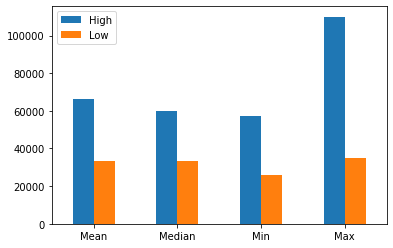

In [45]:
high = [66340.00, 60000.00, 57100.00, 110000.00]
low = [33120.00, 33500.00, 26000.00, 35000.00]
index = ['Mean', 'Median', 'Min','Max']
bar_wage = pd.DataFrame({'High': high,
                         'Low': low}, index=index)
ax = bar_wage.plot.bar(rot=0)

From this, we are able to conclude that there is indeed a hefty wage gap between men and women. Through our data analysis, we have deduced that this is caused by men historically pursuing higher paid industries while women historically pursued lower paid industries. This is also commonly known as occupational segregation, and although we have come to this conclusion, please note that there are several other factors that are involved that we have not analyzed and therefore are not considered in this project.

In [46]:
df = pd.read_csv('/content/drive/MyDrive/i310DFinal/recent-grads.csv')
df_binary = df[['Total', 'Women']]
df_binary.columns = ['Total', 'Women']
df_binary.head()

,Total,Women
0,2339,282
1,756,77
2,856,131
3,1258,135
4,32260,11021


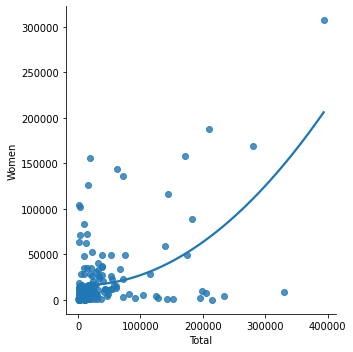

In [47]:
#plotting the Scatter plot to check relationship between Total and Women
sns.lmplot(x ="Total", y ="Women", data = df_binary, order = 2, ci = None)

In [48]:
X = np.array(df_binary['Total']).reshape(-1, 1)
y = np.array(df_binary['Women']).reshape(-1, 1)

# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array
# since each dataframe contains only one column
df_binary.dropna(inplace = True)

# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Splitting the data into training and testing data
regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))


-0.4262754228051353


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


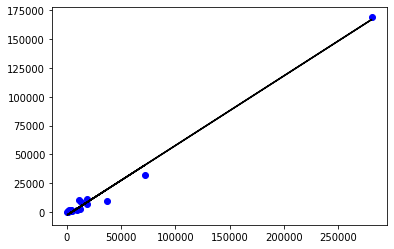

In [59]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')

plt.show()
# Data scatter of predicted values

This plot displays the predicted amount of women graduates pursuing majors in different fields of study, when depending on the columns (x) total and (y) women

In [50]:
df = pd.read_csv('/content/drive/MyDrive/i310DFinal/women-stem.csv')
df_binary = df[['Total', 'Women']]
df_binary.columns = ['Total', 'Women']
df_binary.head()

,Total,Women
0,2339,282
1,756,77
2,856,131
3,1258,135
4,2573,373


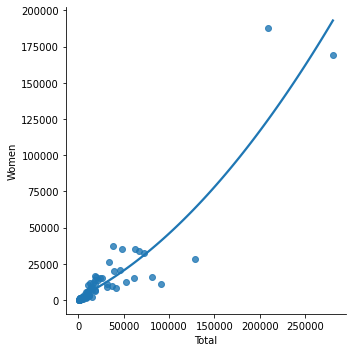

In [51]:
#plotting the Scatter plot to check relationship between Total and Women
sns.lmplot(x ="Total", y ="Women", data = df_binary, order = 2, ci = None)

In [52]:
X = np.array(df_binary['Total']).reshape(-1, 1)
y = np.array(df_binary['Women']).reshape(-1, 1)

# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array
# since each dataframe contains only one column
df_binary.dropna(inplace = True)

# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Splitting the data into training and testing data
regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))


0.9886530534190636


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


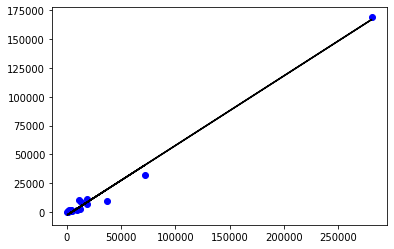

In [57]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')

plt.show()
# Data scatter of predicted values



This plot displays the predicted amount of women graduates pursuing majors in stem, when depending on the columns (x) total and (y) women. [link text](https://)